## Import Library

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

import plotly.graph_objs as go



init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
data = pd.read_csv('athlete_events.csv')
regions = pd.read_csv('noc_regions.csv')

dfAthlete = pd.merge(data, regions, on='NOC', how='left')

In [4]:
dfAthlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


## Clean up data

In [5]:
dfAthlete['Sex'] = dfAthlete['Sex'].astype('category')
dfAthlete['Season'] = dfAthlete['Season'].astype('category')
dfAthlete['Medal'] = dfAthlete['Medal'].astype('category')

In [6]:
dfAthlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null category
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null category
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null category
region    270746 non-null object
notes     5039 non-null object
dtypes: category(3), float64(3), int64(2), object(9)
memory usage: 31.8+ MB


In [7]:
## Fill up nan height and weight data with median
def isidulu(data, kolom):
    grup = data.groupby('Sport').median()[kolom]
    for i in grup.index:
        total = data[data['Sport'] == i]
        total[kolom].fillna(grup[i], inplace = True)
        data[data['Sport'] == i] = total
#         print (data[data['Sport'] == i].describe())
    return data

In [8]:
dfAthlete = isidulu(dfAthlete, 'Weight')
dfAthlete = isidulu(dfAthlete, 'Height')
dfAthlete = isidulu(dfAthlete, 'Age')

/Users/frhamadiansyah/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
dfAthlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null category
Age       271116 non-null float64
Height    271017 non-null float64
Weight    270899 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null category
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null category
region    270746 non-null object
notes     5039 non-null object
dtypes: category(3), float64(3), int64(2), object(9)
memory usage: 31.8+ MB


In [11]:
dfAthlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,71.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,182.0,95.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Boxplot of height, weight and age for each sport

Text(0.5, 1.0, 'Age distribution for each sport')

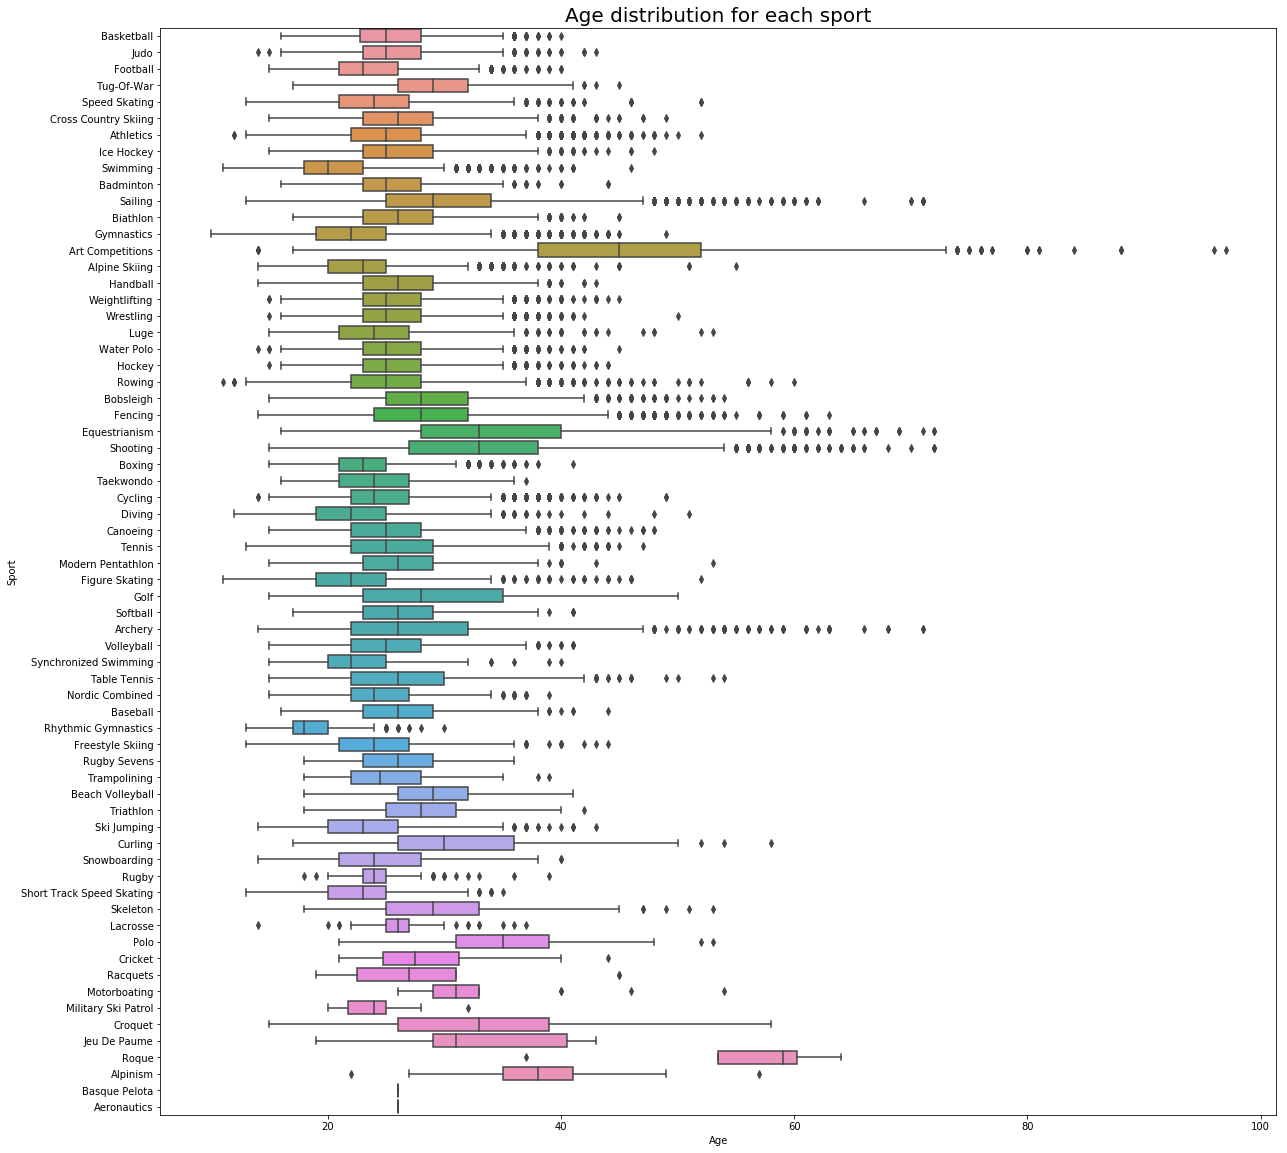

In [142]:
plt.figure(figsize = (20,20))
sns.boxplot(x= 'Age', y = 'Sport', data = dfAthlete, orient = 'h')
plt.title('Age distribution for each sport', fontsize = 20)

Text(0.5, 1.0, 'Height distribution for each sport')

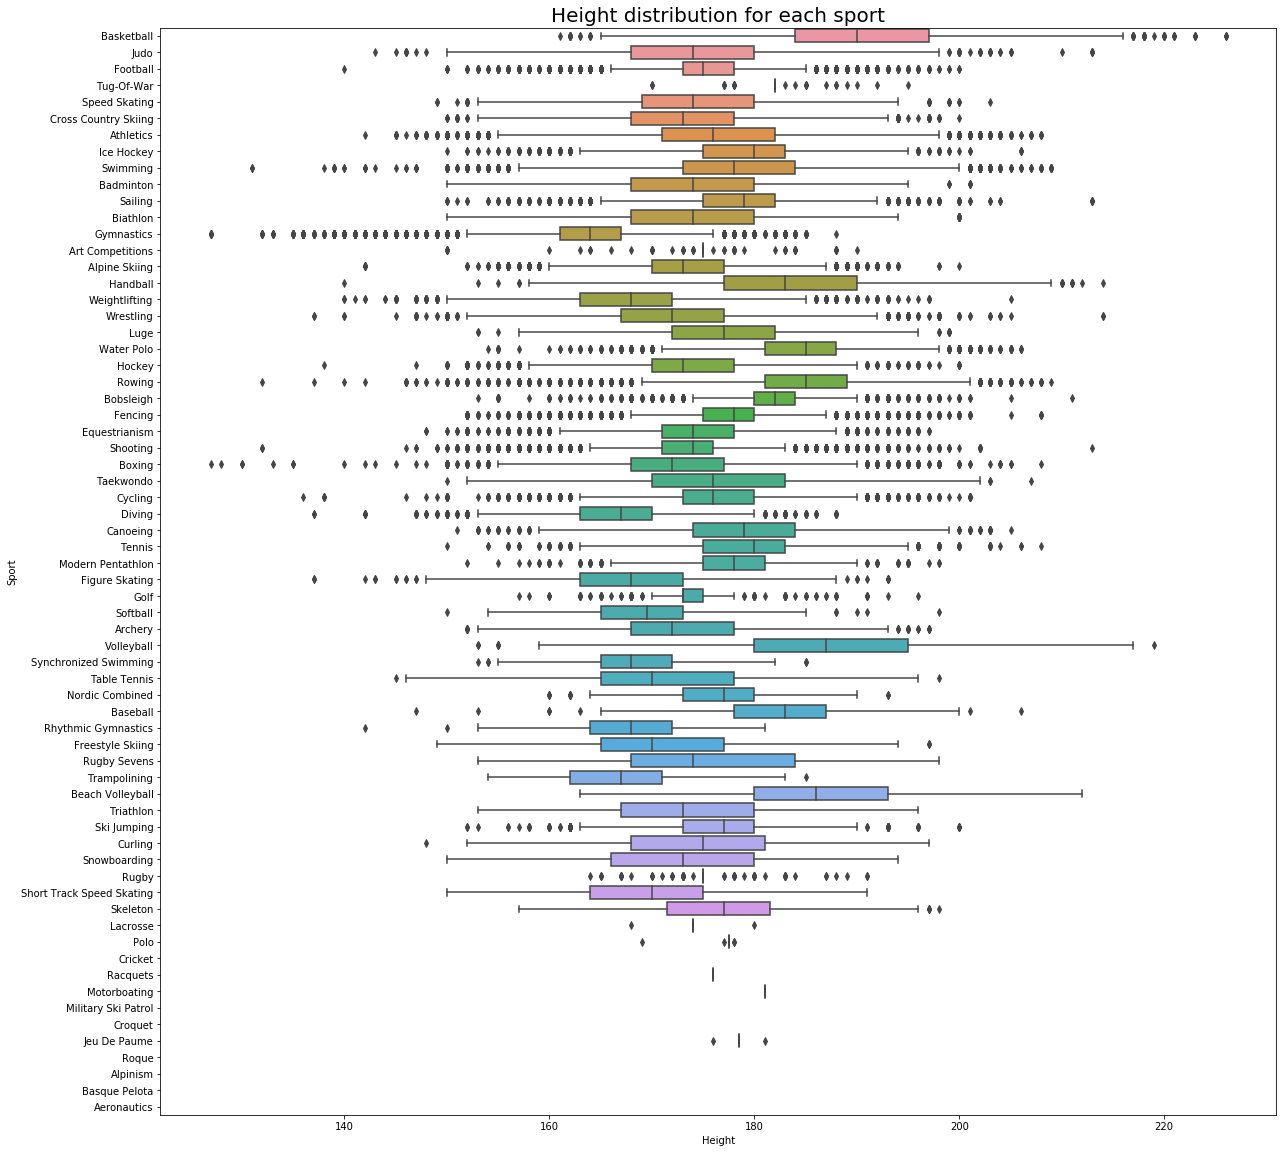

In [143]:
plt.figure(figsize = (20,20))
sns.boxplot(x= 'Height', y = 'Sport', data = dfAthlete, orient = 'h')
plt.title('Height distribution for each sport', fontsize = 20)

Text(0.5, 1.0, 'Weight distribution for each sport')

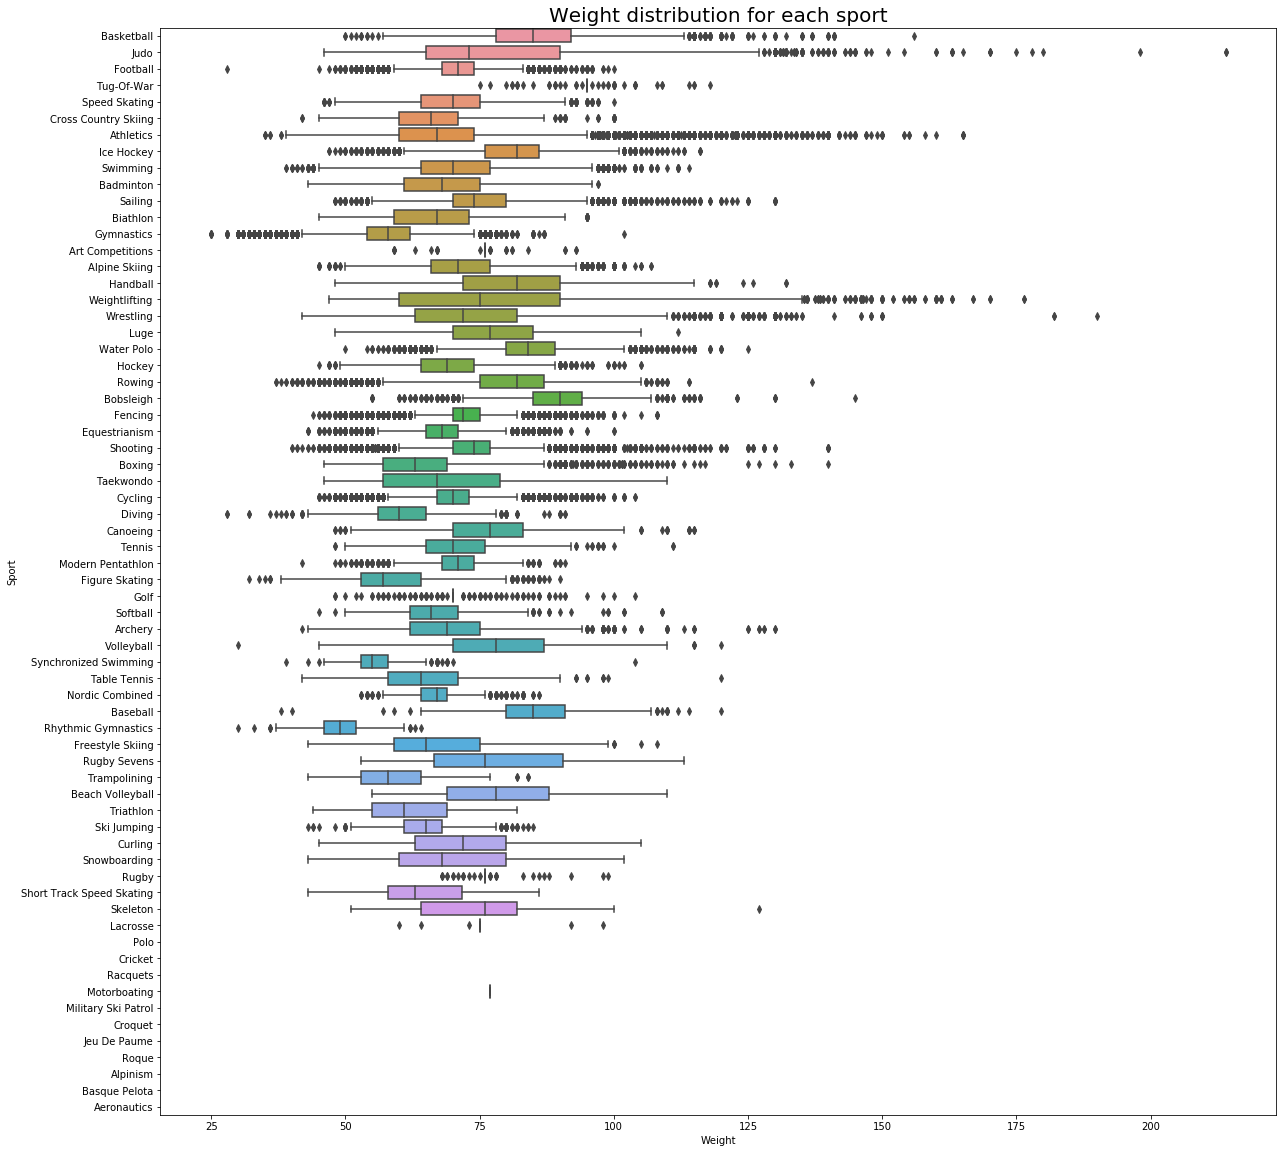

In [144]:
plt.figure(figsize = (20,20))
sns.boxplot(x= 'Weight', y = 'Sport', data = dfAthlete, orient = 'h')
plt.title('Weight distribution for each sport', fontsize = 20)

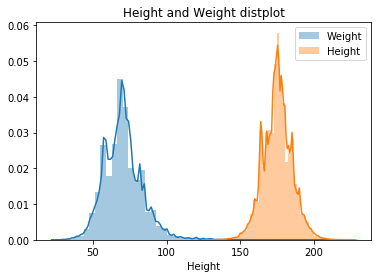

In [154]:
sns.distplot(dfAthlete['Weight'].dropna(), label = 'Weight')
sns.distplot(dfAthlete['Height'].dropna(), label = 'Height')
plt.title('Height and Weight distplot')

plt.legend()

In [137]:
dfAthlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null category
Age       271116 non-null float64
Height    271017 non-null float64
Weight    270899 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null category
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null category
region    270746 non-null object
notes     5039 non-null object
dtypes: category(3), float64(3), int64(2), object(9)
memory usage: 41.8+ MB


In [138]:
dfAthlete['BMI'] = dfAthlete['Weight']/((dfAthlete['Height']/100)**2)


Text(0.5, 1.0, 'BMI distplot')

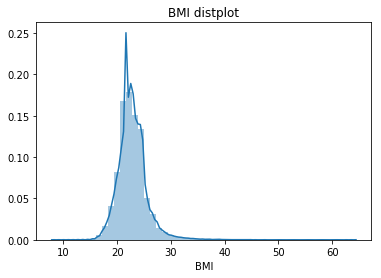

In [146]:
sns.distplot(dfAthlete['BMI'].dropna())
plt.title('BMI distplot')

Text(0.5, 1.0, 'BMI distribution for each sport')

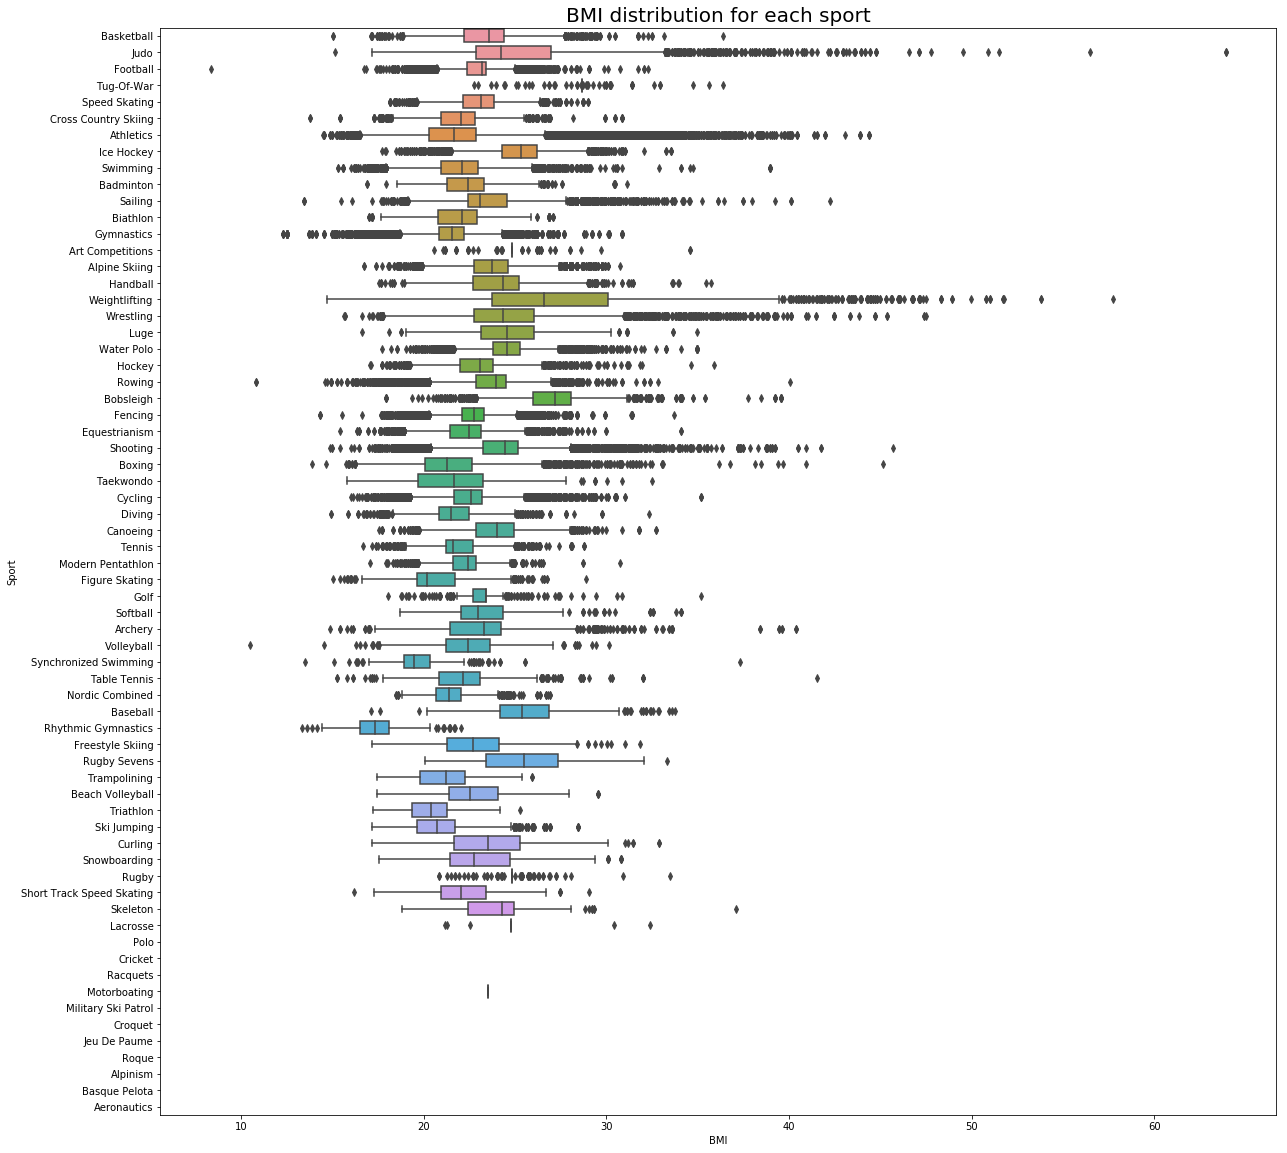

In [147]:
plt.figure(figsize = (20,20))
sns.boxplot(x= 'BMI', y = 'Sport', data = dfAthlete, orient = 'h')
plt.title('BMI distribution for each sport', fontsize = 20)

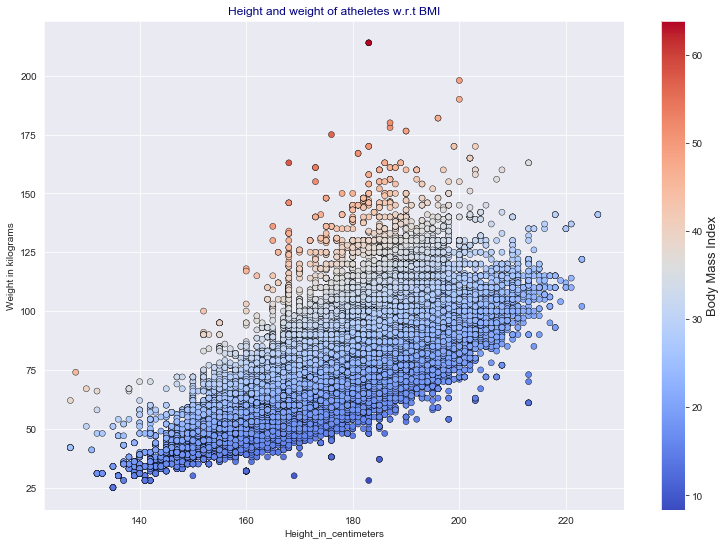

In [181]:
plt.figure(figsize=(13,9))
sns.set_style("darkgrid")
plt.scatter(dfAthlete["Height"],dfAthlete["Weight"],cmap="coolwarm",
            c=dfAthlete["BMI"],linewidth=.4,edgecolor = "k")
lab = plt.colorbar()
lab.set_label("Body Mass Index",fontsize = 13)
plt.xlabel("Height_in_centimeters")
plt.ylabel("Weight in kilograms")
plt.title("Height and weight of atheletes w.r.t BMI",color = "navy")
plt.show()

### Men & Woman Participation throughout the year

In [18]:
summergrupyear = dfAthlete[dfAthlete['Season'] == 'Summer'].groupby('Year')
summergrupyear.describe()['count']

ID                                                         \
        count          mean           std     min       25%      50%   
Year                                                                   
1896    380.0  71099.757895  36655.096562  1724.0  38860.00  70408.0   
1900   1936.0  63681.200930  38151.245009     4.0  27384.00  65714.5   
1904   1301.0  70258.328978  39333.394235   404.0  36559.00  66360.0   
1906   1733.0  70696.454703  38766.790028   139.0  36167.00  74138.0   
1908   3101.0  66412.000967  39343.282126   635.0  31086.00  66094.0   
1912   4040.0  67462.126733  38945.792021    15.0  35155.00  67606.0   
1920   4292.0  66991.033085  39668.355834     3.0  30991.00  66826.0   
1924   5233.0  67403.290273  39003.355770    15.0  32545.00  67170.0   
1928   4992.0  69287.245593  39412.905748    47.0  35050.75  68999.0   
1932   2969.0  65783.303469  38242.459269     8.0  31638.00  64987.0   
1936   6506.0  68822.910083  38643.380947    31.0  35975.00  68499.0   
1948   6405.0  66957.768618  39363.167744    17.0  32018.00  68267.0   
1952   8270.0  68706.643773  38996.875115    10.0  34944.00  68812.0   
1956   5127.0  69529.477082  38594.504796    46.0  36562.50  68514.0   
1960   8119.0  66691.701564  38950.069072    46.0  32222.50  66372.0   
1964   7702.0  68016.418982  38311.483845    87.0  35595.50  67338.5   
1968   8588.0  66975.890661  38983.536850    28.0  33466.75  66466.0   
1972  10304.0  67835.591906  38840.972021    28.0  34664.75  68347.5   
1976   8641.0  67368.515913  39137.652390    52.0  32673.00  66876.0   
1980   7191.0  67581.457934  39214.135694    85.0  32078.00  68546.0   
1984   9454.0  66683.485509  39573.464705    27.0  32053.00  67846.0   
1988  12037.0  67223.416466  39195.539329    29.0  33597.00  67914.0   
1992  12977.0  68062.458581  38895.169834     1.0  34832.00  69229.0   
1996  13780.0  68545.551089  38881.786216    13.0  35306.25  68901.0   
2000  13821.0  68945.626366  39290.989404    12.0  34899.00  69922.0   
2004  13443.0  69143.966079  39387.050909    23.0  34921.50  69456.0   
2008  13602.0  68966.250110  39467.312718    21.0  34678.50  69162.0   
2012  12920.0  68078.358901  39280.975536     2.0  34318.25  68218.0   
2016  13688.0  68145.304135  39735.448448    22.0  33079.00  69360.0   

                               Age             ... Height          Weight  \
            75%       max    count       mean  ...    75%    max    count   
Year                                           ...                          
1896  102806.00  135481.0    380.0  24.836842  ...  176.0  188.0    380.0   
1900   97275.00  134198.0   1936.0  27.946798  ...  179.0  191.0   1870.0   
1904  107550.00  135103.0   1301.0  26.099154  ...  176.0  195.0   1297.0   
1906  104554.00  135474.0   1733.0  26.583958  ...  178.0  196.0   1733.0   
1908  100656.00  135474.0   3101.0  26.674944  ...  178.0  201.0   3066.0   
1912  100712.25  135474.0   4040.0  27.592079  ...  178.0  200.0   4040.0   
1920  101440.75  135455.0   4292.0  28.733924  ...  178.0  197.0   4275.0   
1924  100779.00  135539.0   5233.0  28.202752  ...  178.0  200.0   5209.0   
1928  103477.00  135561.0   4992.0  29.028446  ...  178.0  202.0   4992.0   
1932   97577.00  135264.0   2969.0  33.308858  ...  177.0  200.0   2967.0   
1936  103979.50  135536.0   6506.0  28.135260  ...  178.0  205.0   6482.0   
1948  101790.00  135534.0   6405.0  28.722717  ...  178.0  213.0   6405.0   
1952  103708.75  135553.0   8270.0  26.217654  ...  178.0  213.0   8270.0   
1956  103778.50  135553.0   5127.0  25.928613  ...  179.0  218.0   5127.0   
1960  100902.00  135553.0   8119.0  25.267767  ...  180.0  218.0   8119.0   
1964  101106.25  135553.0   7702.0  25.061542  ...  180.0  218.0   7702.0   
1968  100770.75  135541.0   8588.0  24.259432  ...  181.0  216.0   8588.0   
1972  101903.25  135566.0  10304.0  24.334433  ...  182.0  223.0  10304.0   
1976  101410.00  135504.0   8641.0  23.867839  ...  182.0  220.0   8641.0   
1980  100618

In [56]:
summerYearTotal = dfAthlete[dfAthlete['Season'] == 'Summer'].groupby('Year')
# summergrupyeartotal.describe()['ID']['count']
summerYearTotal_x = [i for i in summerYearTotal.describe()['ID']['count'].index]
summerYearTotal_y = [i for i in summerYearTotal.describe()['ID']['count']]

summerYearMale = dfAthlete[(dfAthlete['Season'] == 'Summer')& (dfAthlete['Sex'] == 'M')].groupby('Year')
summerYearMale_x = [i for i in summerYearMale.describe()['ID']['count'].index]
summerYearMale_y = [i for i in summerYearMale.describe()['ID']['count']]

summerYearFemale = dfAthlete[(dfAthlete['Season'] == 'Summer')& (dfAthlete['Sex'] == 'F')].groupby('Year')
summerYearFemale_x = [i for i in summerYearFemale.describe()['ID']['count'].index]
summerYearFemale_y = [i for i in summerYearFemale.describe()['ID']['count']]

In [57]:
# summerYearTotal.describe(exclude = [np.number])['Event']
# 
summerYearEvent = dfAthlete[dfAthlete['Season'] == 'Summer'].groupby('Year')
# summergrupyeartotal.describe()['ID']['count']
summerYearEvent_x = [i for i in summerYearEvent.describe(exclude=[np.number])['Event']['count'].index]
summerYearEvent_y = [i for i in summerYearEvent.describe(exclude=[np.number])['Event']['count']]

summerYearEventMale = dfAthlete[(dfAthlete['Season'] == 'Summer')& (dfAthlete['Sex'] == 'M')].groupby('Year')
summerYearEventMale_x = [i for i in summerYearEventMale.describe(exclude=[np.number])['Event']['count'].index]
summerYearEventMale_y = [i for i in summerYearEventMale.describe(exclude=[np.number])['Event']['count']]

summerYearEventFemale = dfAthlete[(dfAthlete['Season'] == 'Summer')& (dfAthlete['Sex'] == 'F')].groupby('Year')
summerYearEventFemale_x = [i for i in summerYearEventFemale.describe(exclude=[np.number])['Event']['count'].index]
summerYearEventFemale_y = [i for i in summerYearEventFemale.describe(exclude=[np.number])['Event']['count']]

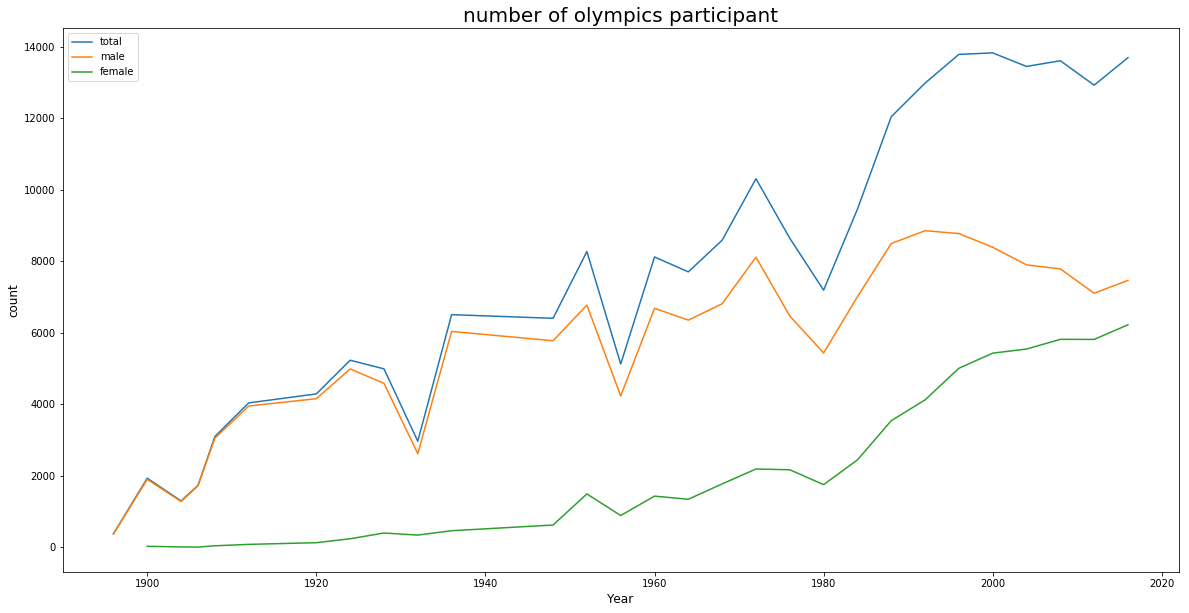

In [148]:
plt.figure(figsize = (20,10))
plt.plot(summerYearTotal_x, summerYearTotal_y, label = 'total')
plt.plot(summerYearMale_x, summerYearMale_y,label = 'male')
plt.plot(summerYearFemale_x, summerYearFemale_y,label = 'female')
plt.title('number of olympics participant', fontsize = 20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.legend()



In [111]:
jumlahEvent = dfAthlete[dfAthlete['Season'] == 'Summer'].groupby(['Year', 'Event']).count()
jumlahPerTahun_x  = [j[0] for j in jumlahEvent.index]
jumlahPerTahun_y = [len(jumlahEvent.loc[j[0]]) for j in jumlahEvent.index]


jumlahEventMale = dfAthlete[(dfAthlete['Season'] == 'Summer') & (dfAthlete['Sex'] == 'M')].groupby(['Year', 'Event']).count()
jumlahPerTahunMale_x  = [j[0] for j in jumlahEventMale.index]
jumlahPerTahunMale_y = [len(jumlahEventMale.loc[j[0]]) for j in jumlahEventMale.index]

jumlahEventFemale = dfAthlete[(dfAthlete['Season'] == 'Summer') & (dfAthlete['Sex'] == 'F')].groupby(['Year', 'Event']).count()
jumlahPerTahunFemale_x  = [j[0] for j in jumlahEventFemale.index]
jumlahPerTahunFemale_y = [len(jumlahEventFemale.loc[j[0]]) for j in jumlahEventFemale.index]



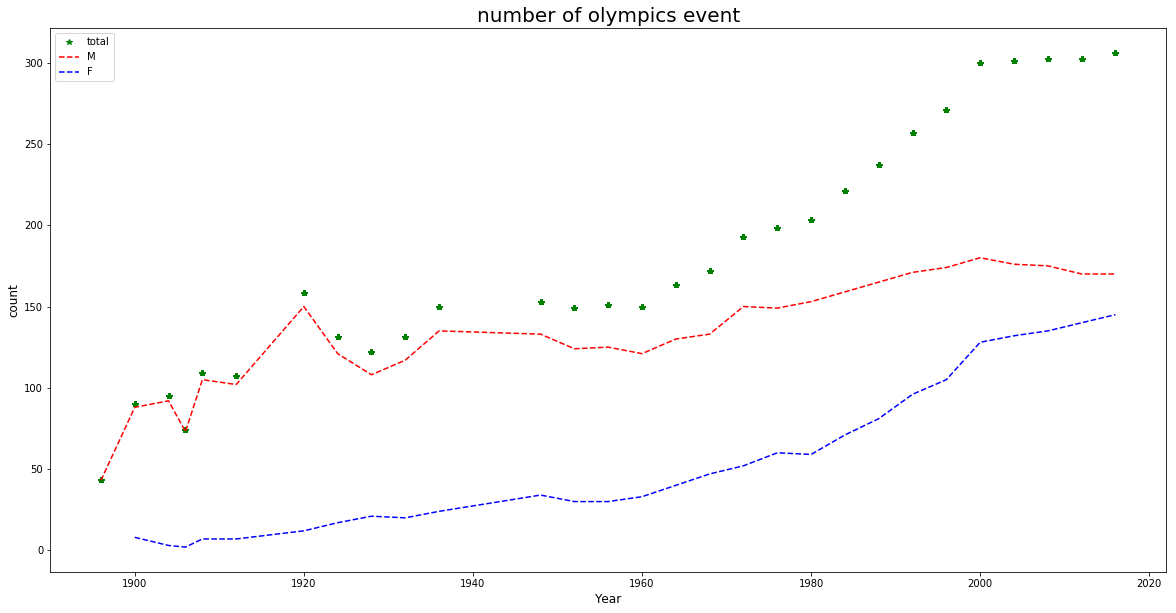

In [149]:
plt.figure(figsize = (20,10))
plt.plot(jumlahPerTahun_x, jumlahPerTahun_y, 'g*',label = 'total')
plt.plot(jumlahPerTahunMale_x, jumlahPerTahunMale_y, 'r--',label = 'M')
plt.plot(jumlahPerTahunFemale_x, jumlahPerTahunFemale_y,'b--', label = 'F')
plt.title('number of olympics event', fontsize = 20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.legend()


In [123]:
SportjumlahEvent = dfAthlete[dfAthlete['Season'] == 'Summer'].groupby(['Year', 'Sport']).count()
SportjumlahPerTahun_x  = [j[0] for j in SportjumlahEvent.index]
SportjumlahPerTahun_y = [len(SportjumlahEvent.loc[j[0]]) for j in SportjumlahEvent.index]


SportjumlahEventMale = dfAthlete[(dfAthlete['Season'] == 'Summer') & (dfAthlete['Sex'] == 'M')].groupby(['Year', 'Sport']).count()
SportjumlahPerTahunMale_x  = [j[0] for j in SportjumlahEventMale.index]
SportjumlahPerTahunMale_y = [len(SportjumlahEventMale.loc[j[0]]) for j in SportjumlahEventMale.index]

SportjumlahEventFemale = dfAthlete[(dfAthlete['Season'] == 'Summer') & (dfAthlete['Sex'] == 'F')].groupby(['Year', 'Sport']).count()
SportjumlahPerTahunFemale_x  = [j[0] for j in SportjumlahEventFemale.index]
SportjumlahPerTahunFemale_y = [len(SportjumlahEventFemale.loc[j[0]]) for j in SportjumlahEventFemale.index]

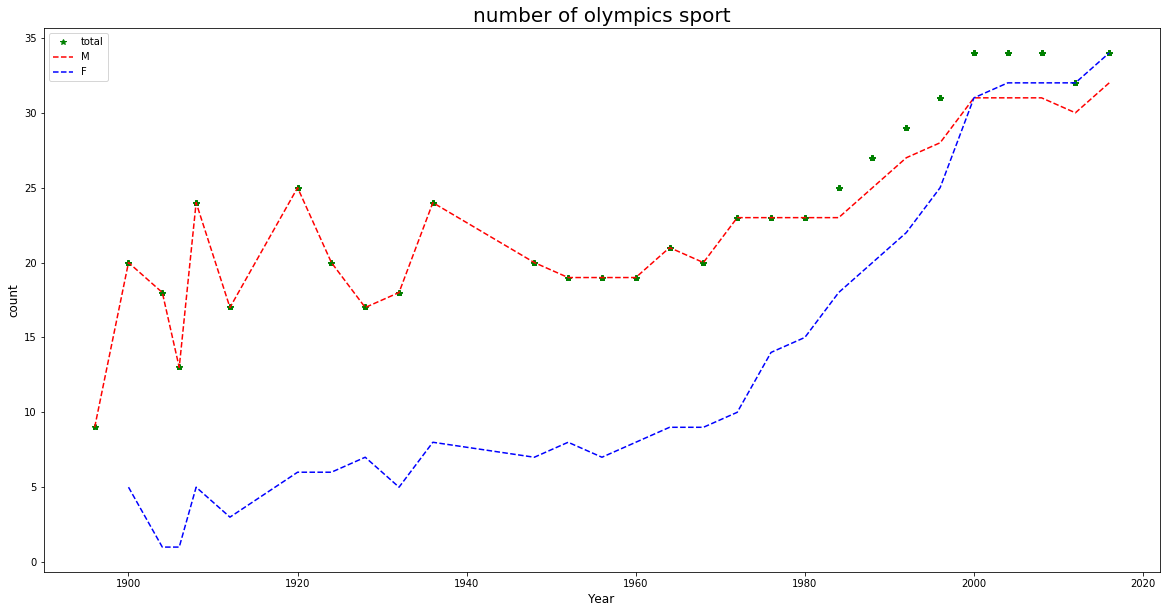

In [150]:
plt.figure(figsize = (20,10))
plt.plot(SportjumlahPerTahun_x, SportjumlahPerTahun_y, 'g*',label = 'total')
plt.plot(SportjumlahPerTahunMale_x, SportjumlahPerTahunMale_y, 'r--',label = 'M')
plt.plot(SportjumlahPerTahunFemale_x, SportjumlahPerTahunFemale_y,'b--', label = 'F')
plt.title('number of olympics sport', fontsize = 20)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.legend()

In [152]:
# plt.figure(figsize = (20,10))
# plt.plot(SportjumlahPerTahun_x, SportjumlahPerTahun_y, 'g*',label = 'total')
# plt.plot(SportjumlahPerTahunMale_x, SportjumlahPerTahunMale_y, 'r--',label = 'M')
# plt.plot(SportjumlahPerTahunFemale_x, SportjumlahPerTahunFemale_y,'b--', label = 'F')
# plt.legend()

fig = go.Figure()
fig.add_trace(go.Scatter(x = SportjumlahPerTahun_x, y = SportjumlahPerTahun_y, mode = 'markers', name = 'total'))
fig.add_trace(go.Scatter(x = SportjumlahPerTahunMale_x, y = SportjumlahPerTahunMale_y, mode = 'lines', name = 'M'))
fig.add_trace(go.Scatter(x = SportjumlahPerTahunFemale_x, y = SportjumlahPerTahunFemale_y, mode = 'lines', name = 'F'))

fig.show()


In [125]:
dfAthlete['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

## Medal tally for each country

In [165]:
gold_medal = pd.Series(dfAthlete[dfAthlete['Medal'] == 'Gold'].groupby(['Year','Event']).first()['region'].value_counts(), name = 'Gold')
silver_medal = pd.Series(dfAthlete[dfAthlete['Medal'] == 'Silver'].groupby(['Year','Event']).first()['region'].value_counts(), name = 'Silver')
bronze_medal = pd.Series(dfAthlete[dfAthlete['Medal'] == 'Bronze'].groupby(['Year','Event']).first()['region'].value_counts(), name = 'Bronze')

In [166]:
medal=pd.concat([gold_medal, silver_medal, bronze_medal], axis = 1, sort = True).sort_values('Gold', ascending = False).head(10)

In [167]:
medal.head(10)

,Gold,Silver,Bronze
USA,1124.0,894.0,761.0
Russia,716.0,591.0,543.0
Germany,574.0,588.0,558.0
UK,286.0,316.0,288.0
France,264.0,279.0,305.0
Italy,254.0,225.0,232.0
China,239.0,183.0,158.0
Sweden,198.0,212.0,234.0
Hungary,176.0,154.0,167.0
Norway,167.0,157.0,144.0


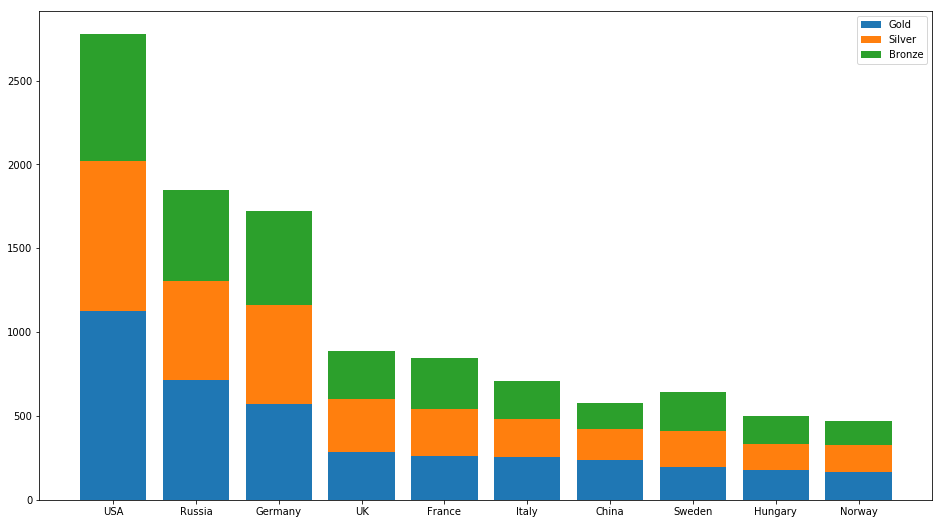

In [168]:

country=[x for x in medal.index]

gold=[x for x in medal['Gold']]
silver=[x for x in medal['Silver']]
bronze=[x for x in medal['Bronze']]

barp=np.add(gold,silver).tolist()

pos=[x for x in range(len(medal))]

plt.figure(figsize=(16,9))
plt.bar(country,gold,label='Gold')
plt.bar(country,silver,bottom=gold, label='Silver')
plt.bar(country,bronze,bottom=barp, label='Bronze')

plt.legend()
plt.show()

In [159]:
gold_medal

USA        1124
Russia      716
Germany     574
UK          286
France      264
Italy       254
China       239
Sweden      198
Hungary     176
Norway      167
Name: Gold, dtype: int64

## Medal tally for individual

In [170]:
gold_medal = pd.Series(dfAthlete[dfAthlete['Medal'] == 'Gold']['Name'].value_counts(), name = 'Gold')
silver_medal = pd.Series(dfAthlete[dfAthlete['Medal'] == 'Silver']['Name'].value_counts(), name = 'Silver')
bronze_medal = pd.Series(dfAthlete[dfAthlete['Medal'] == 'Bronze']['Name'].value_counts(), name = 'Bronze')

In [171]:
medal=pd.concat([gold_medal, silver_medal, bronze_medal], axis = 1, sort = True).sort_values('Gold', ascending = False).head(10)

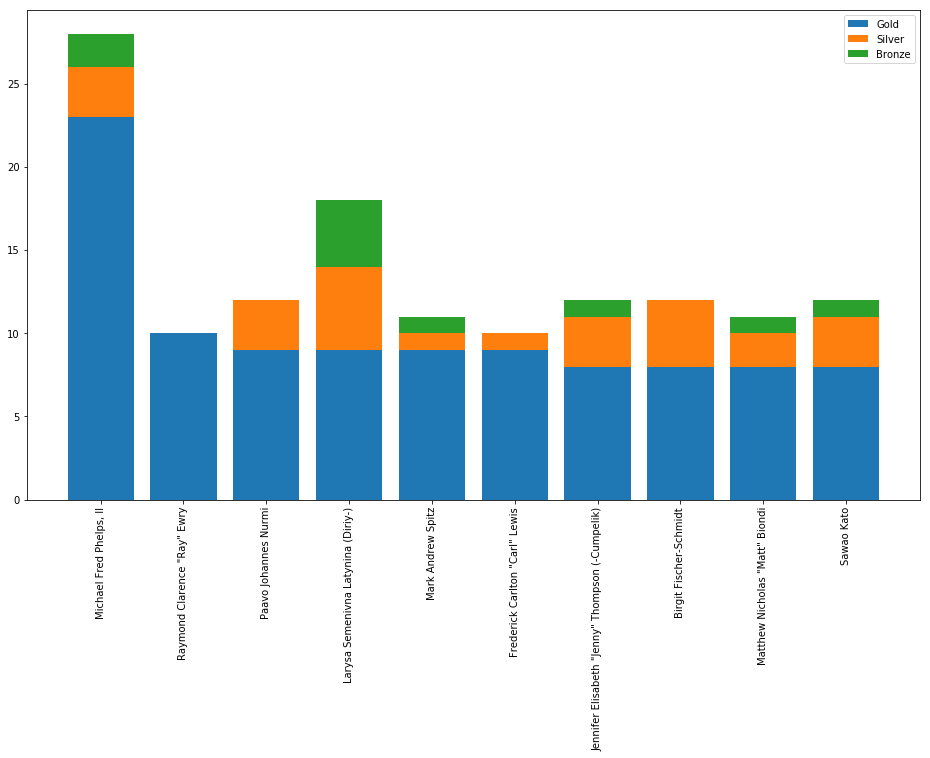

<Figure size 432x288 with 0 Axes>

In [179]:

country=[x for x in medal.index]

gold=[x for x in medal['Gold']]
silver=[x for x in medal['Silver']]
bronze=[x for x in medal['Bronze']]

barp=np.add(gold,silver).tolist()

pos=[x for x in range(len(medal))]

plt.figure(figsize=(16,9))
plt.bar(country,gold,label='Gold')
plt.bar(country,silver,bottom=gold, label='Silver')
plt.bar(country,bronze,bottom=barp, label='Bronze')

plt.xticks(fontsize = 10, rotation = 90)
plt.legend()
plt.show()
plt.tight_layout()